# C1_성민지_회귀분석_220808

---

In [9]:
# 데이터 처리, 행렬 연산
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 회귀분석, qqplot, 회귀분석의 상수항 추가, 선형모델, 평가함수
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
dat = pd.read_csv('/home/piai/minji/dataset/체질검사.csv')

print(dat.shape)
dat.head()

(252, 14)


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [7]:
dat['BMI'] = dat['WEIGHT'] * 0.45 / (dat['HEIGHT'] * 0.0254) ** 2

print(dat.shape)
dat.head()

(252, 15)


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165


**변수 간의 경향성 파악 - 그래프 분석**

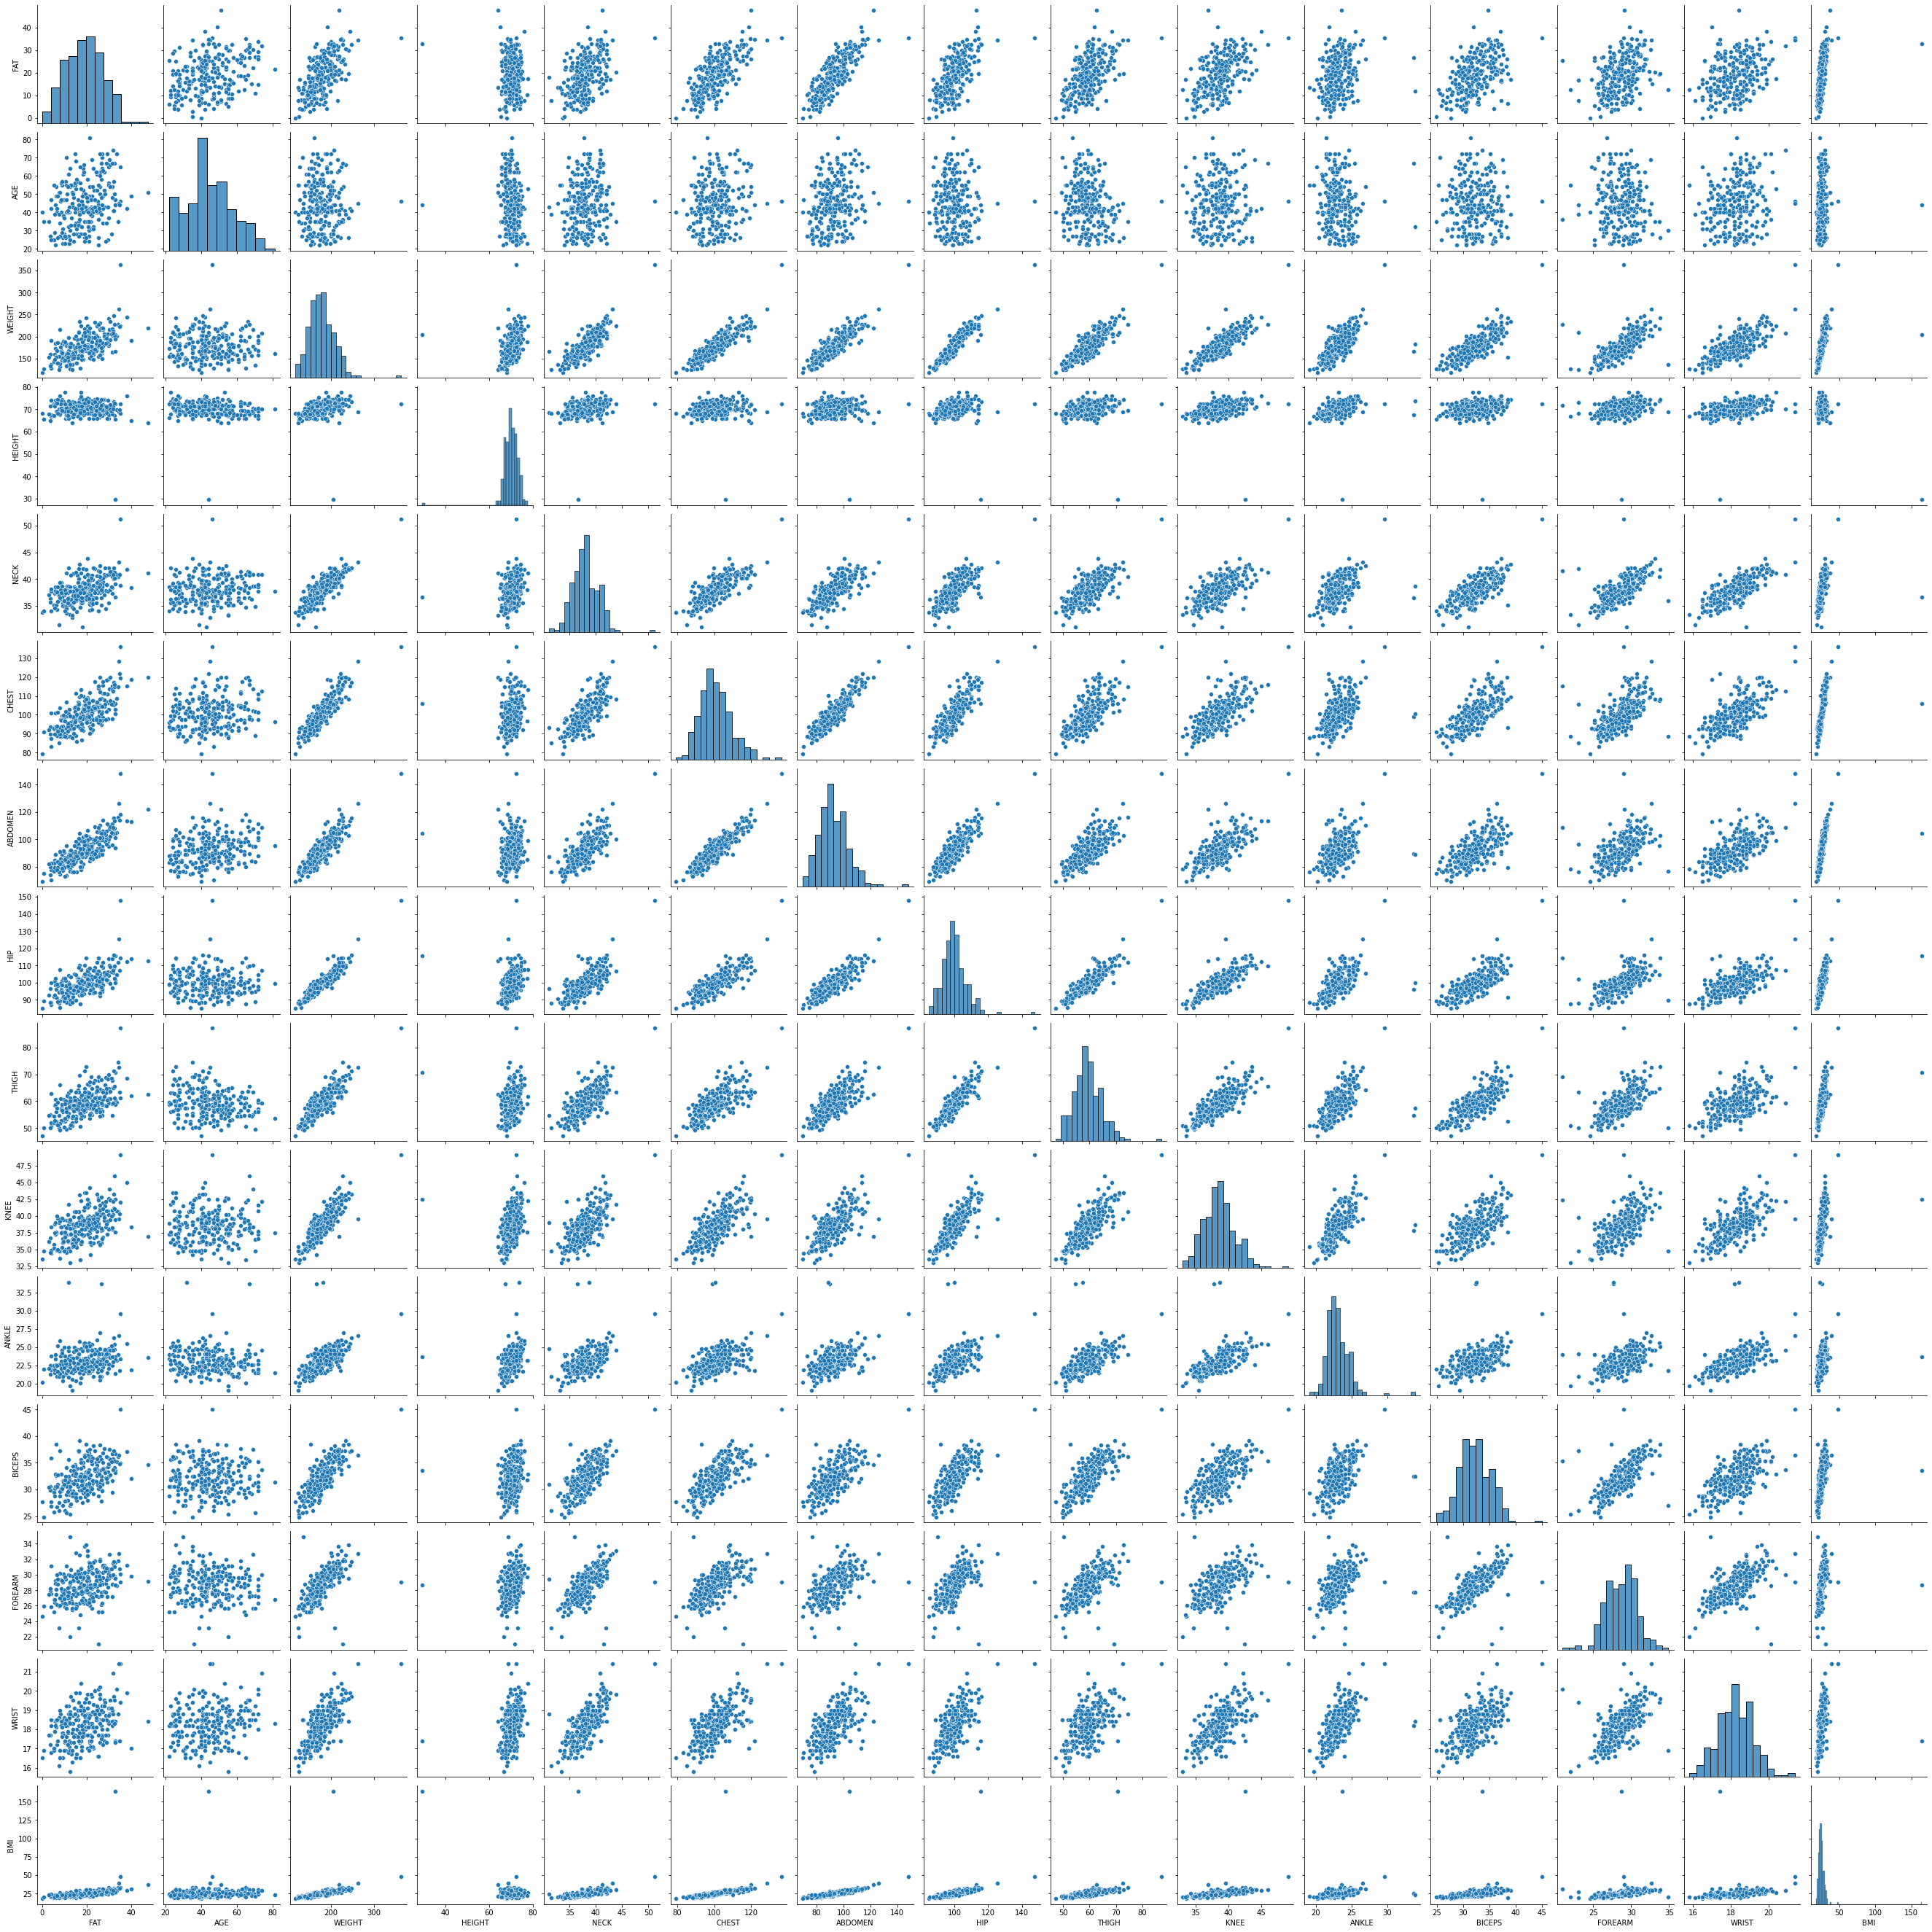

In [10]:
sns.pairplot(dat)

In [17]:
dat.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,0.391
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,-0.638
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364


목표변수 FAT와 높은 상관관계를 가지는 변수는 CHEST, ABDOMEN이다. 이들은 FAT과 0.703, 그리고 0.813의 상관계수를 갖는다.

한편 설명변수 사이에도 선형성이 존재한다 :
- WEIGHT - NECK, CHEST, ABDOMEN, HIP, THIGH, KNEE, BICEPS
- NECK - WEIGHT
- CHEST - WEIGHT, ABNOMEN, HIP
- ABNOMEN - WEIGHT,CHEST, HIP
- HIP - WEIGHT, CHEST, ABDOMEN, THIGH, KNEE
- THIGH - WEIGHT, HIP
- KNEE - WEIGHT, HIP
- BICEPS - WEIGHT

**회귀 모델 생성**

In [13]:
dat_train, dat_test = train_test_split(dat, test_size = 0.4, random_state = 1234)
print('train data size: {}'.format(dat_train.shape))
print('test data size: {}'.format(dat_test.shape))

train data size: (151, 15)
test data size: (101, 15)


모델링을 위한 데이터셋을 구상해준다. train : test = 6 : 4의 비율로 나누어 (151, 15) 크기의 train data와 (101, 15) 크기의 test data를 만들어줬다.

In [14]:
reg_model = smf.ols(formula = 'FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + \
                    THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI', data = dat_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     31.77
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           5.19e-36
Time:                        20:29:51   Log-Likelihood:                -424.76
No. Observations:                 151   AIC:                             879.5
Df Residuals:                     136   BIC:                             924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -51.7190     31.607     -1.636      0.1

<FAT에 대한 회귀분석을 진행한 결과>

- 관측값 및 자유도
    - 데이터의 관측값은 총 151개이며, 잔차의 자유도와 모델의 자유도는 각각 136개와 14개이다.
    
    
- 회귀 모형의 유의성 검정
    - F통계량 31.77에 대한 p-value = 5.19e-36 < 0.05이므로 귀무가설을 기각한다. 따라서, 회귀 모형은 유의하다.
    

- 모형의 설명력
    - 다중선형 회귀분석의 수정결정계수는 0.742로, 해당 회귀모형은 약 74.2%의 설명력을 갖는다고 할 수 있다.
    
    
- 회귀계수의 유의성 검정
    - ABDOMEN, FOREARM의 t통계량 7.198, 2.175에 대한 p-value = 0.000, 0.03 < 0.05이므로 귀무가설을 기각한다. 두 설명변수는 목표변수 FAT에 유의한 영향을 준다는 결론을 내릴 수 있다.

**설명변수 간의 다중공선성 확인**

In [16]:
dat_train_x = dat_train.drop('FAT', axis = 1)
dat_train_x_const = add_constant(dat_train_x)

dat_vif = pd.DataFrame()
dat_vif['variable'] = dat_train_x_const.columns
dat_vif['VIF'] = [variance_inflation_factor(dat_train_x_const.values, i) for i in range(dat_train_x_const.shape[1])]

dat_vif.sort_values('VIF', ascending = False).round(2)

,variable,VIF
0,const,8361.56
2,WEIGHT,56.45
7,HIP,16.17
6,ABDOMEN,15.41
3,HEIGHT,12.07
5,CHEST,11.51
14,BMI,10.30
8,THIGH,9.26
9,KNEE,5.32
4,NECK,4.59


<다중공선성 확인 결과>

WEIGHT, HIP, ABDOMEN, HEIGHT, CHEST, 그리고 BMI가 각각 56.45, 16.17, 15.41, 12.07, 11.51, 10.30의 VIF값을 보여주고 있다. 그 중 WEIGHT은 가장 높은 VIF값을 보여주고 있으며, 목표변수인 FAT과의 상관성도 약 0.6으로 약한 편이기 때문에 해당 설명변수를 제거해준다.

In [19]:
reg_model2 = smf.ols(formula = 'FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
                               KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI', data = dat_train)

reg_result2 = reg_model2.fit()
print(reg_result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     33.35
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           4.56e-36
Time:                        21:05:13   Log-Likelihood:                -426.64
No. Observations:                 151   AIC:                             881.3
Df Residuals:                     137   BIC:                             923.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2911     10.937      0.301      0.7

<다중공선성 고려 후 FAT에 대한 회귀분석을 진행한 결과>

- 관측값 및 자유도
    - 데이터의 관측값은 총 151개이며, 잔차의 자유도와 모델의 자유도는 각각 137개와 13개이다.
    
    
- 회귀 모형의 유의성 검정
    - F통계량 33.35에 대한 p-value = 4.56e-36 < 0.05이므로 귀무가설을 기각한다. 따라서, 회귀 모형은 유의하다.
    

- 모형의 설명력
    - 다중선형 회귀분석의 수정결정계수는 0.737로, 해당 회귀모형은 약 73.7%의 설명력을 갖는다고 할 수 있다.
    
    
- 회귀계수의 유의성 검정
    - NECK, ABDOMEN, HIP, FOREARM의 t통계량 -2.382, 6.907, -2.132, 2.153에 대한 p-value = 0.019, 0.000, 0.035, 0.033 < 0.05이므로 귀무가설을 기각한다. 4개의 설명변수는 목표변수 FAT에 유의한 영향을 준다는 결론을 내릴 수 있다.

In [27]:
dat_train_x_const2

,const,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
83,1.0,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.149554
218,1.0,24,156.00,70.75,35.7,92.7,81.9,95.3,56.4,36.5,22.0,33.5,28.3,17.3,21.737860
61,1.0,46,192.50,71.75,38.0,106.6,97.5,100.6,58.9,40.5,24.5,33.3,29.6,19.1,26.081466
134,1.0,34,131.50,67.50,36.2,88.6,74.6,85.3,51.7,34.7,21.4,28.7,27.0,16.5,20.130904
188,1.0,44,223.00,69.75,40.9,121.6,113.9,107.1,63.5,40.3,21.8,34.8,30.7,17.4,31.971390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,1.0,26,186.25,74.50,38.5,101.5,83.6,98.2,59.7,39.7,25.2,32.8,29.4,18.5,23.406087
53,1.0,25,143.75,72.50,35.2,92.3,76.5,92.1,51.9,35.7,22.0,25.8,25.2,16.9,19.075544
38,1.0,43,170.75,68.50,37.2,96.3,90.6,99.3,61.9,38.0,22.3,33.3,28.2,18.1,25.381930
211,1.0,48,173.75,72.00,37.0,99.1,92.0,98.3,59.3,38.4,22.4,27.9,26.2,17.0,23.377868


In [28]:
dat_train_x2 = dat_train.drop(['FAT', 'WEIGHT'], axis = 1)
dat_train_x_const2 = add_constant(dat_train_x2)

dat_vif2 = pd.DataFrame()
dat_vif2['variable'] = dat_train_x_const2.columns
dat_vif2['VIF'] = [variance_inflation_factor(dat_train_x_const2.values, i) for i in range(dat_train_x_const2.shape[1])]

dat_vif2.sort_values('VIF', ascending = False).round(2)

,variable,VIF
0,const,983.75
5,ABDOMEN,13.92
6,HIP,12.65
4,CHEST,9.42
7,THIGH,9.09
13,BMI,6.79
2,HEIGHT,6.76
8,KNEE,5.20
3,NECK,3.90
12,WRIST,3.43


ABDOMEN의 VIF가 13.92로 높은 편이지만, 목표변수인 FAT과의 0.703의 높은 상관관계를 가지기 때문에 제거하지 않기로 한다.

**잔차의 가정 확인**

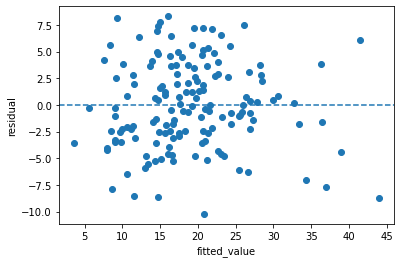

In [29]:
# 등분산성

plt.scatter(reg_result2.fittedvalues, reg_result2.resid)
plt.xlabel('fitted_value')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '--')

잔차가 y=0을 기준으로 랜덤하게 분포되어 있기 때문에 등분산성을 만족한다고 볼 수 있다.

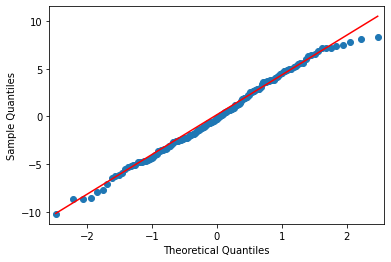

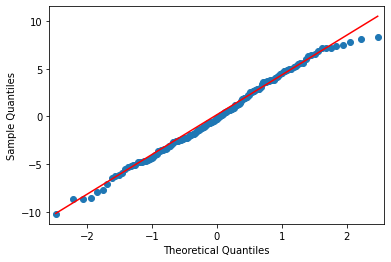

In [37]:
# 정규성 검정

qqplot(reg_result2.resid, line = 'q')

데이터가 정규분포 직선을 중심으로 분포되어 있으므로 정규분포를 따른다고 볼 수 있다.

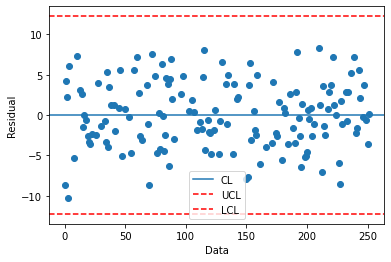

In [32]:
# 독립성 검정

plt.scatter(dat_train.index, reg_result2.resid)
plt.xlabel("Data") ; plt.ylabel("Residual")
plt.axhline(y = 0, linestyle = "-", label = "CL")
plt.axhline(y = 3*np.std(reg_result2.resid), linestyle = "--", color = "red", label = "UCL")
plt.axhline(y = -3*np.std(reg_result2.resid), linestyle = "dashed", color = "red", label = "LCL")
plt.legend()

잔차가 y=0을 기준으로 관리상하한(UCL)을 벗어나지 않고, 랜덤하게 분포되어 있으므로 독립성을 만족한다고 볼 수 있다.

**모델의 성능**

In [35]:
train_pred = reg_result2.predict(dat_train)
test_pred = reg_result2.predict(dat_test)
print("train data의 결정계수:", r2_score(dat_train["FAT"], train_pred))
print("test data의 결정계수:", r2_score(dat_test["FAT"], test_pred))

train data의 결정계수: 0.7598986745572158
test data의 결정계수: 0.7031832944839718


train data와 test data의 결정계수는 각각 0.75, 0.70이다. 즉, train data와 test data는 각각 75%와 70%의 성능을 갖는다고 할 수 있다.

**후진제거법을 이용한 변수 선택 및 모델 생성**

In [41]:
dat_train_y = dat_train['FAT']
dat_train_x = dat_train.drop('FAT', axis = 1)

model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 5).fit(dat_train_x, dat_train_y)

selected_cols = dat_train_x.columns[rfe.support_]
removed_cols = dat_train_x.columns[~rfe.support_]

print("Selected variables : {}".format(selected_cols))
print("Removed variables : {}".format(removed_cols))

Selected variables : Index(['NECK', 'ABDOMEN', 'ANKLE', 'FOREARM', 'WRIST'], dtype='object')
Removed variables : Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'BICEPS',
       'BMI'],
      dtype='object')


후진제거법을 통해 5개의 유의한 변수를 선택한 결과이다.

NECK, ABDOMEN, ANKLE, FOREARM, 그리고 WRIST가 선택되었다. 다섯 개의 설명변수를 사용하여 회귀모형을 다시 만들어준다.

In [43]:
rfe_reg_model = smf.ols(formula = 'FAT ~ NECK + ABDOMEN + ANKLE + FOREARM + WRIST', data = dat_train)

rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     73.17
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           6.49e-38
Time:                        21:42:14   Log-Likelihood:                -439.27
No. Observations:                 151   AIC:                             890.5
Df Residuals:                     145   BIC:                             908.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.3095      7.539     -1.633      0.1

후진제거법을 시행한 결과이다.

NECK, ABDOMEN, FOREARM의 t통계량 -3.256, 15.819, 1.985에 대한 p-value = 0.001, 0.000, 0.049 < 0.05이므로 귀무가설을 기각한다. 즉, 3개의 변수는 목표변수 FAT에 의미있는 영향을 미치는 것으로 해석 가능하다.

**설명변수의 중요도**

In [46]:
rfe_reg_result.params.values[1:]

array([-0.86531025,  0.80634945, -0.37611009,  0.47465338, -0.84755487])

<AxesSubplot:>

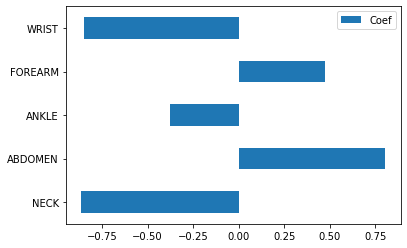

In [47]:
dat_reg_coef = pd.DataFrame({'Coef' : rfe_reg_result.params.values[1:]},
                           index = ['NECK', 'ABDOMEN', 'ANKLE', 'FOREARM', 'WRIST'])
dat_reg_coef.plot.barh(y = 'Coef')

설명변수의 중요도를 파악하였다.

WRIST와 NECK이 커질수록 FAT도 커진다는 것을 확인할 수 있다.